In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_fDE import Class
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from scipy.optimize import minimize, brentq, curve_fit
from scipy.integrate import cumtrapz
from scipy.interpolate import interp1d
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import AutoMinorLocator, LogLocator, NullFormatter
from matplotlib.patches import Patch
import scienceplots
import seaborn as sns
import matplotlib as mpl
from scipy.optimize import curve_fit
from matplotlib import cm
from matplotlib.colors import Normalize, ListedColormap
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
plt.style.use('../class_fDE/fDE_notebooks/mine.mplstyle')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amssymb}"
})

In [14]:
desi_cmb_w0wa_data=np.load("output/desi_cmb_w0wa.npz")
desi_cmb_fa_data=np.load("output/desi_cmb_fa.npz")

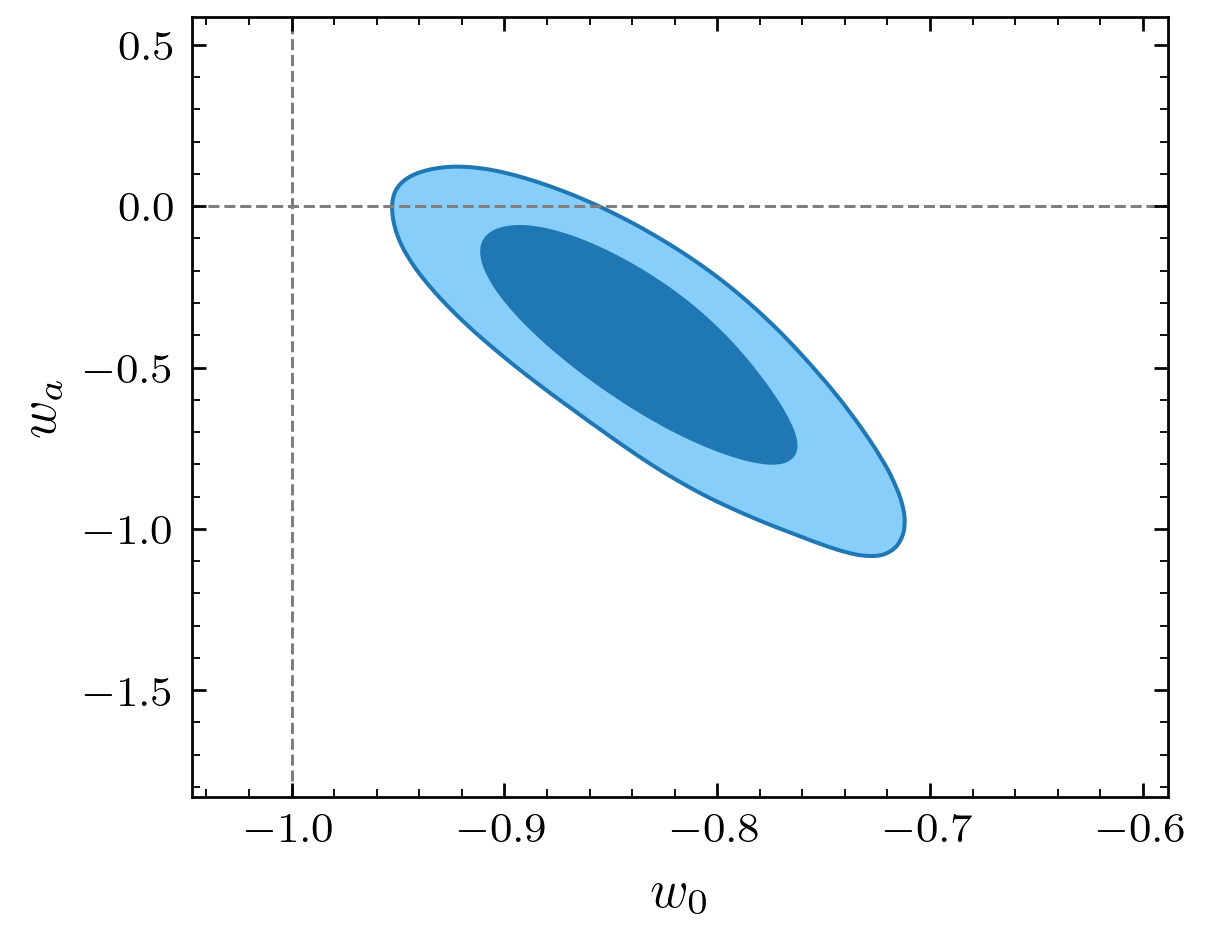

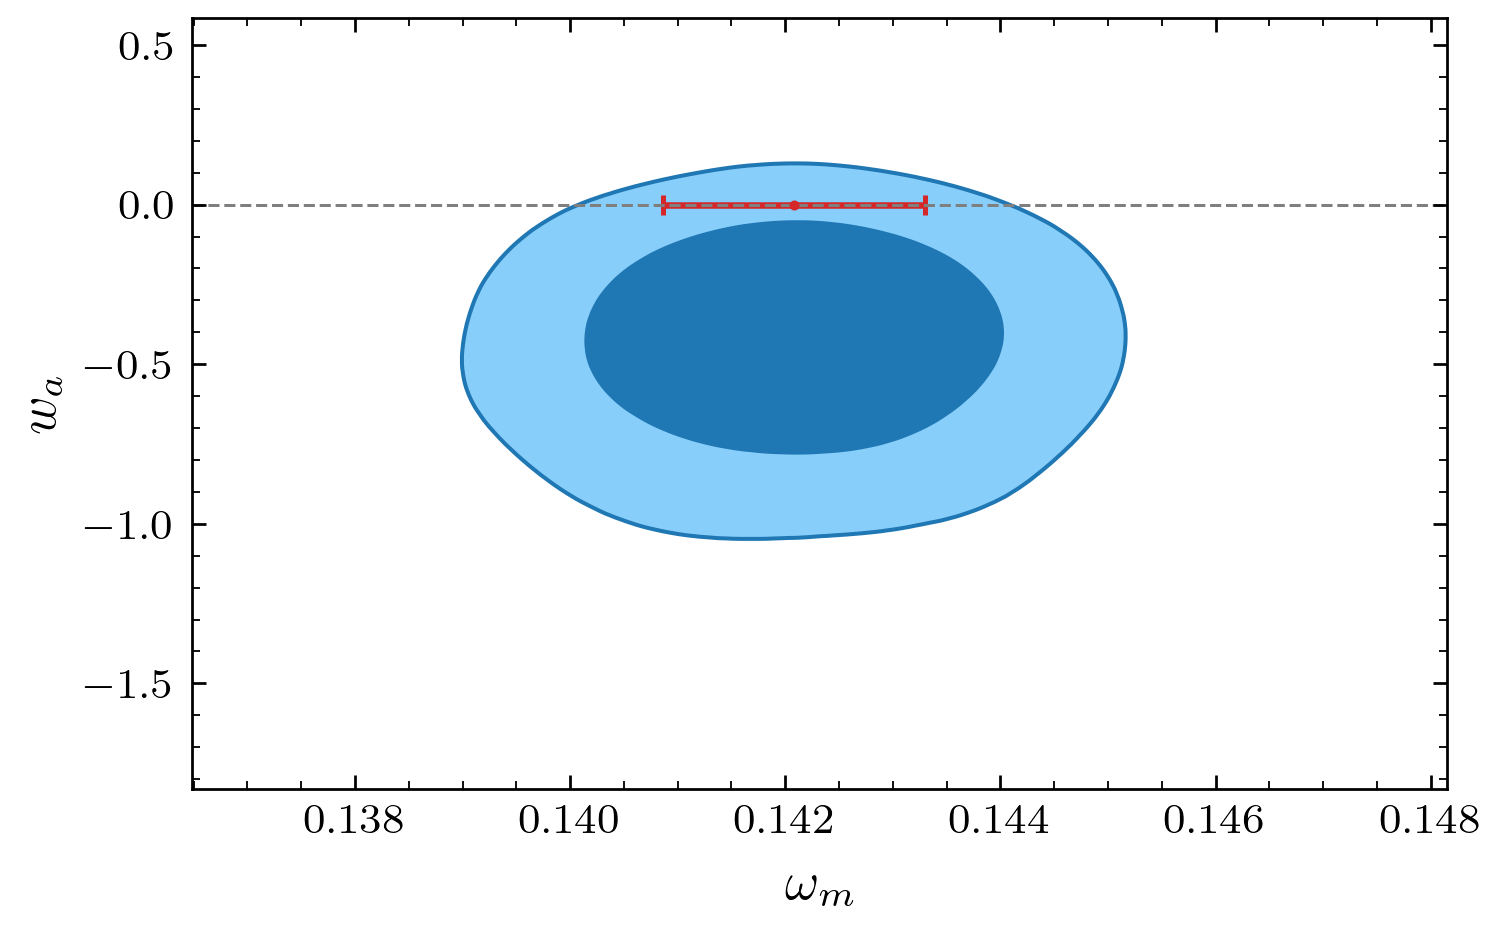

In [43]:
fig = plt.figure(figsize=(3.5, 3.5/1.61803398875*1.3))
cs=['tab:blue', 'lightskyblue']

X= desi_cmb_w0wa_data[f"desi_cmb_w0wa_wa_fld__w0_fld_x"]
Y= desi_cmb_w0wa_data[f"desi_cmb_w0wa_wa_fld__w0_fld_y"]
P= desi_cmb_w0wa_data[f"desi_cmb_w0wa_wa_fld__w0_fld_p_grid"]
contour_levels=desi_cmb_w0wa_data[f"desi_cmb_w0wa_wa_fld__w0_fld_contour_levels"]
levels = sorted(np.append([P.max()+1], contour_levels))
plt.contourf(X,Y, P, levels=levels, colors=[cs[1],cs[0]])
plt.contour(X,Y, P, levels=levels, colors=[cs[0],cs[0]], linewidths=0.8) 
plt.axhline(0,lw=.6,ls='--',c='tab:gray')
plt.axvline(-1,lw=.6,ls='--',c='tab:gray')
plt.xlabel(r"$w_0$")
plt.ylabel(r"$w_a$")
plt.savefig("figs/desi_cmb_w0wa_v0.png")
plt.savefig("figs/desi_cmb_w0wa_v0.pdf")
plt.show()
"""
X= desi_cmb_w0wa_data[f"desi_cmb_w0wa_wa_fld__theta_s_100_x"]
Y= desi_cmb_w0wa_data[f"desi_cmb_w0wa_wa_fld__theta_s_100_y"]
P= desi_cmb_w0wa_data[f"desi_cmb_w0wa_wa_fld__theta_s_100_p_grid"]
contour_levels=desi_cmb_w0wa_data[f"desi_cmb_w0wa_wa_fld__theta_s_100_contour_levels"]
levels = sorted(np.append([P.max()+1], contour_levels))
plt.contourf(X,Y, P, levels=levels, colors=[cs[1],cs[0]])
plt.contour(X,Y, P, levels=levels, colors=[cs[0],cs[0]], linewidths=0.8) 
plt.errorbar(0.01041*100,0,xerr=np.sqrt(1e-9*66.21),marker='.',capsize=2, markersize=2,c='tab:red')
plt.axhline(0,lw=.6,ls='--',c='tab:gray')
plt.xlabel(r"$100\,\theta_s$")
plt.ylabel(r"$w_a$")
plt.savefig("figs/desi_cmb_w0wa_v1.png")
plt.savefig("figs/desi_cmb_w0wa_v1.pdf")
plt.show()
"""
X= desi_cmb_w0wa_data[f"desi_cmb_w0wa_wa_fld__omega_m_x"]
Y= desi_cmb_w0wa_data[f"desi_cmb_w0wa_wa_fld__omega_m_y"]
P= desi_cmb_w0wa_data[f"desi_cmb_w0wa_wa_fld__omega_m_p_grid"]
contour_levels=desi_cmb_w0wa_data[f"desi_cmb_w0wa_wa_fld__omega_m_contour_levels"]
levels = sorted(np.append([P.max()+1], contour_levels))
plt.contourf(X,Y, P, levels=levels, colors=[cs[1],cs[0]])
plt.contour(X,Y, P, levels=levels, colors=[cs[0],cs[0]], linewidths=0.8) 
plt.errorbar(0.14208,0,xerr=np.sqrt(1488.4*1e-9),marker='.',capsize=2, markersize=2,c='tab:red')
plt.axhline(0,lw=.6,ls='--',c='tab:gray')
plt.xlabel(r"$\omega_m$")
plt.ylabel(r"$w_a$")
plt.savefig("figs/desi_cmb_w0wa_v2.png")
plt.savefig("figs/desi_cmb_w0wa_v2.pdf")
plt.show()

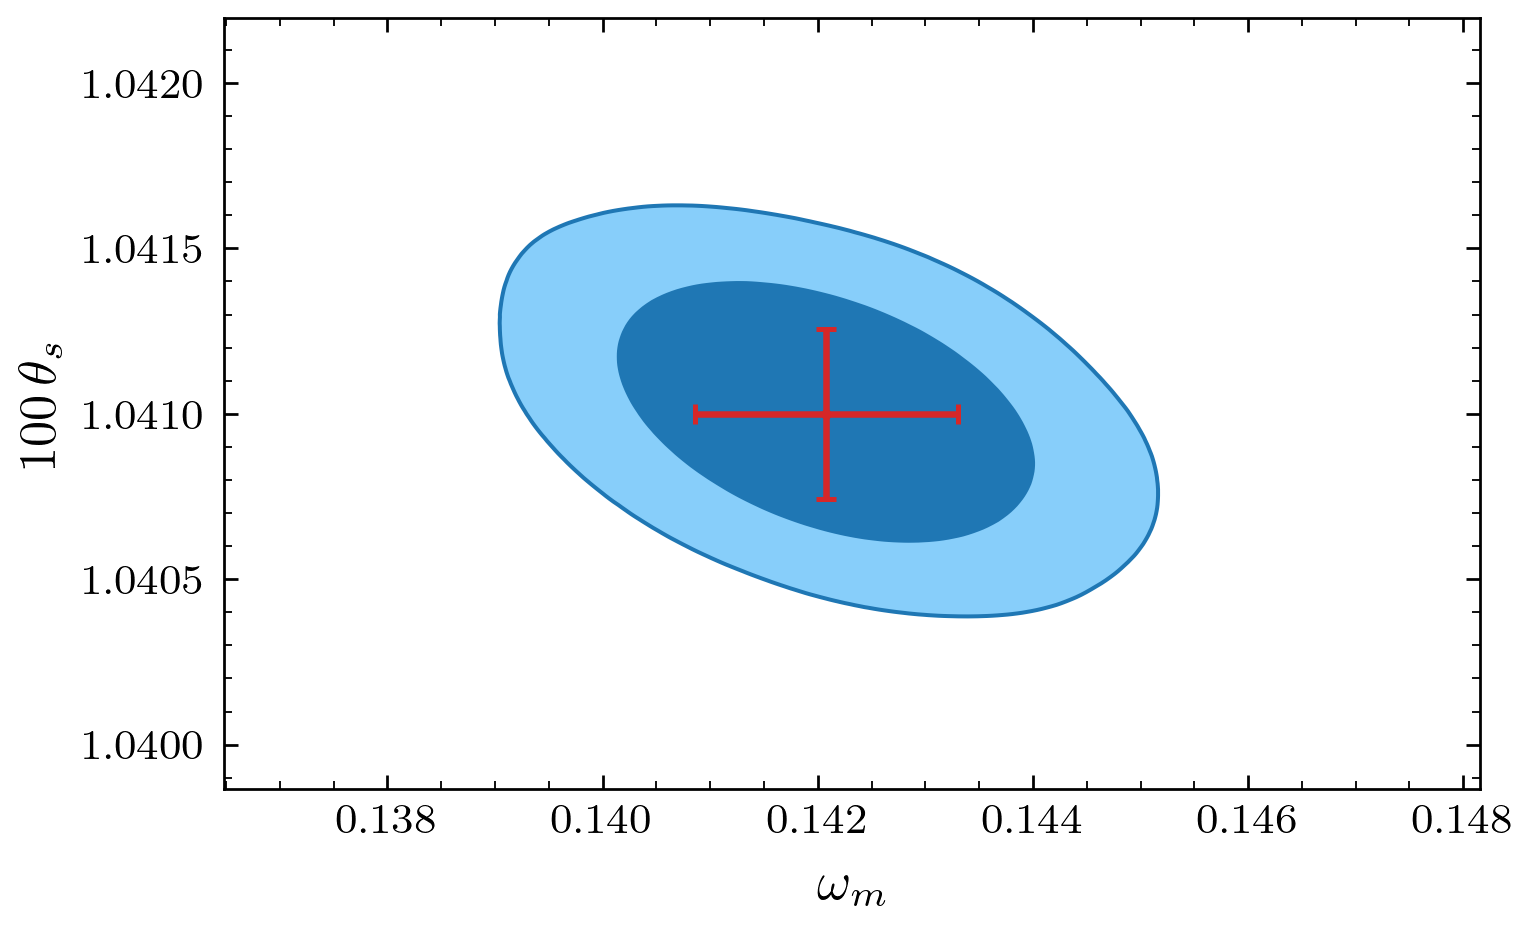

In [49]:
X= desi_cmb_w0wa_data[f"desi_cmb_w0wa_theta_s_100__omega_m_x"]
Y= desi_cmb_w0wa_data[f"desi_cmb_w0wa_theta_s_100__omega_m_y"]
P= desi_cmb_w0wa_data[f"desi_cmb_w0wa_theta_s_100__omega_m_p_grid"]
contour_levels=desi_cmb_w0wa_data[f"desi_cmb_w0wa_theta_s_100__omega_m_contour_levels"]
levels = sorted(np.append([P.max()+1], contour_levels))
plt.contourf(X,Y, P, levels=levels, colors=[cs[1],cs[0]])
plt.contour(X,Y, P, levels=levels, colors=[cs[0],cs[0]], linewidths=0.8) 
plt.errorbar(0.14208,0.01041*100,yerr=np.sqrt(1e-9*66.21),marker='.',capsize=2, markersize=2,c='tab:red')
plt.errorbar(0.14208,0.01041*100,xerr=np.sqrt(1488.4*1e-9),marker='.',capsize=2, markersize=2,c='tab:red')
plt.ylabel(r"$100\,\theta_s$")
plt.xlabel(r"$\omega_m$")
#plt.savefig("figs/desi_cmb_w0wa_v0.png")
#plt.savefig("figs/desi_cmb_w0wa_v0.pdf")
plt.show()

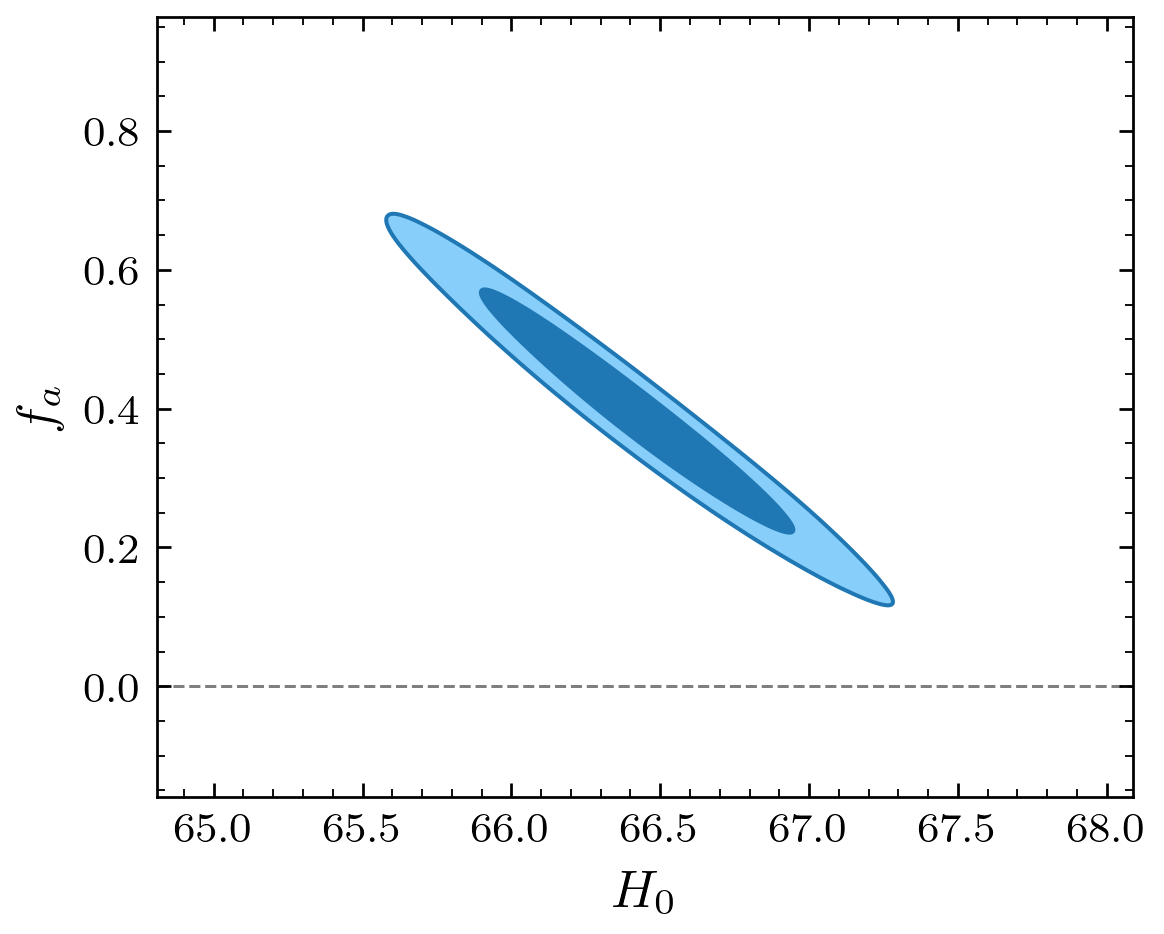

In [25]:
fig = plt.figure(figsize=(3.5, 3.5/1.61803398875*1.3))
cs=['tab:blue', 'lightskyblue']

#X= desi_cmb_fa_data[f"desi_cmb_fa_fa_fld__omega_m_x"]
#Y= desi_cmb_fa_data[f"desi_cmb_fa_fa_fld__omega_m_y"]
#P= desi_cmb_fa_data[f"desi_cmb_fa_fa_fld__omega_m_p_grid"]
X= desi_cmb_fa_data[f"desi_cmb_fa_H0__fa_fld_x"]
Y= desi_cmb_fa_data[f"desi_cmb_fa_H0__fa_fld_y"]
P= desi_cmb_fa_data[f"desi_cmb_fa_H0__fa_fld_p_grid"]
contour_levels=desi_cmb_fa_data[f"desi_cmb_fa_H0__fa_fld_contour_levels"]
levels = sorted(np.append([P.max()+1], contour_levels))
plt.contourf(Y,X, P.T, levels=levels, colors=[cs[1],cs[0]])
plt.contour(Y,X, P.T, levels=levels, colors=[cs[0],cs[0]], linewidths=0.8)     
#plt.contourf(X,Y, P, levels=levels, colors=[cs[1],cs[0]])
#plt.contour(X,Y, P, levels=levels, colors=[cs[0],cs[0]], linewidths=0.8)     
plt.axhline(0,lw=.6,ls='--',c='tab:gray')
plt.xlabel(r"$H_0$")
plt.ylabel(r"$f_a$")
plt.savefig("figs/desi_cmb_fa_v1.png")
plt.savefig("figs/desi_cmb_fa_v1.pdf")
plt.show()